# ICCV2019-Learning to Paint

## [Arxiv](https://arxiv.org/abs/1903.04411) | [Github](https://github.com/hzwer/LearningToPaint.git)
## Abstract

We show how to teach machines to paint like human painters, who can use a
small number of strokes to create fantastic paintings. By employing a neural
renderer in model-based Deep Reinforcement Learning (DRL), our agents learn to
determine the position and color of each stroke and make long-term plans to
decompose texture-rich images into strokes. Experiments demonstrate that
excellent visual effects can be achieved using hundreds of strokes. The
training process does not require the experience of human painters or stroke
tracking data.

* Our ICCV poster
  <div>
<a target="_blank" rel="noopener noreferrer" href="https://github.com/hzwer/ICCV2019-LearningToPaint/blob/master/demo/lisa.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/lisa.gif" alt="Demo" style="max-width:100%;"></a><a target="_blank" rel="noopener noreferrer" href="/hzwer/ICCV2019-LearningToPaint/blob/master/demo/sunrise.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/sunrise.gif" alt="Demo" style="max-width:100%;"></a><a target="_blank" rel="noopener noreferrer" href="/hzwer/ICCV2019-LearningToPaint/blob/master/demo/sunflower.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/sunflower.gif" alt="Demo" style="max-width:100%;"></a>
<a target="_blank" rel="noopener noreferrer" href="/hzwer/ICCV2019-LearningToPaint/blob/master/demo/palacemuseum.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/palacemuseum.gif" alt="Demo" style="max-width:100%;"></a><a target="_blank" rel="noopener noreferrer" href="https://github.com/hzwer/ICCV2019-LearningToPaint/blob/master/demo/deepdream_night.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/deepdream_night.gif" alt="Demo" style="max-width:100%;"></a><a target="_blank" rel="noopener noreferrer" href="/hzwer/ICCV2019-LearningToPaint/blob/master/demo/deepdream_bird.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/deepdream_bird.gif" alt="Demo" style="max-width:100%;"></a>
</div>



## **1. Clone the project**

In [ ]:
!git clone https://github.com/hzwer/LearningToPaint.git

Cloning into 'LearningToPaint'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 456 (delta 12), reused 1 (delta 1), pack-reused 432
Receiving objects: 100% (456/456), 18.66 MiB | 46.50 MiB/s, done.
Resolving deltas: 100% (245/245), done.


In [ ]:
cd LearningToPaint/

/content/LearningToPaint


In [ ]:
!mkdir uploaded_images

## **2. Download the renderer and the actor**

In [ ]:
#@title Choose a stroke pattern (renderer/actor)

option = 'Triangle' #@param ["Default", "Triangle", "Round", "Bezierwotrans"]
print(option)

Triangle


In [ ]:
urls = {
    "Default" : {"renderer": "https://drive.google.com/uc?export=download&id=1-7dVdjCIZIxh8hHJnGTK-RA1-jL1tor4", "actor": "https://drive.google.com/uc?export=download&id=1a3vpKgjCVXHON4P7wodqhCgCMPgg1KeR" },
		"Triangle" : {"renderer": "https://drive.google.com/uc?authuser=0&id=1YefdnTuKlvowCCo1zxHTwVJ2GlBme_eE&export=download", "actor": "https://drive.google.com/uc?authuser=0&id=1k8cgh3tF7hKFk-IOZrgsUwlTVE3CbcPF&export=download" },
		"Round" : {"renderer": "https://drive.google.com/uc?authuser=0&id=1kI4yXQ7IrNTfjFs2VL7IBBL_JJwkW6rl&export=download", "actor": "https://drive.google.com/uc?authuser=0&id=1ewDErUhPeGsEcH8E5a2QAcUBECeaUTZe&export=download" },
		"Bezierwotrans" : {"renderer": "https://drive.google.com/uc?authuser=0&id=1XUdti00mPRh1-1iU66Uqg4qyMKk4OL19&export=download", "actor": "https://drive.google.com/uc?authuser=0&id=1VBtesw2rHmYu2AeJ22XvTCuzuqkY8hZh&export=download" }
}

renderer_url = urls[option]["renderer"]
print(renderer_url)
actor_url = urls[option]["actor"]
print(actor_url)

https://drive.google.com/uc?authuser=0&id=1YefdnTuKlvowCCo1zxHTwVJ2GlBme_eE&export=download
https://drive.google.com/uc?authuser=0&id=1k8cgh3tF7hKFk-IOZrgsUwlTVE3CbcPF&export=download


In [ ]:
!wget "$renderer_url" -O renderer.pkl

--2021-02-24 08:28:45--  https://drive.google.com/uc?authuser=0&id=1YefdnTuKlvowCCo1zxHTwVJ2GlBme_eE&export=download
Resolving drive.google.com (drive.google.com)... 172.217.9.206, 2607:f8b0:4004:808::200e
Connecting to drive.google.com (drive.google.com)|172.217.9.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/uc?id=1YefdnTuKlvowCCo1zxHTwVJ2GlBme_eE&export=download [following]
--2021-02-24 08:28:45--  https://drive.google.com/uc?id=1YefdnTuKlvowCCo1zxHTwVJ2GlBme_eE&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/urjmbhu16n6kuj9ss6gh7lriqppmimj7/1614155325000/10102393604162075786/*/1YefdnTuKlvowCCo1zxHTwVJ2GlBme_eE?e=download [following]
--2021-02-24 08:28:46--  https://doc-14-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc

In [ ]:
!wget "$actor_url" -O actor.pkl

--2021-02-24 08:28:51--  https://drive.google.com/uc?authuser=0&id=1k8cgh3tF7hKFk-IOZrgsUwlTVE3CbcPF&export=download
Resolving drive.google.com (drive.google.com)... 172.217.12.238, 2607:f8b0:4004:804::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.238|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/uc?id=1k8cgh3tF7hKFk-IOZrgsUwlTVE3CbcPF&export=download [following]
--2021-02-24 08:28:51--  https://drive.google.com/uc?id=1k8cgh3tF7hKFk-IOZrgsUwlTVE3CbcPF&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nmju9ghd9pgc749vdk6drhmq8jk8g0fc/1614155325000/10102393604162075786/*/1k8cgh3tF7hKFk-IOZrgsUwlTVE3CbcPF?e=download [following]
--2021-02-24 08:28:53--  https://doc-0k-58-docs.googleusercontent.com/docs/securesc/ha0ro937gc

In [ ]:
from google.colab import files

<a id='start'></a>

## **3. Remove existing files and upload ours one**

In [ ]:
!rm -rf ./output/*
![ -e video.mp4 ] && rm video.mp4

In [ ]:
uploaded = files.upload()
pic_name = list(uploaded.keys())[0]
print(pic_name)
!mv ./$pic_name ./uploaded_images/$pic_name

Saving kolkata.jpg to kolkata.jpg
kolkata.jpg


## **4. Create the painting's strokes**
PS: It can take a while

In [ ]:
!python3 baseline/test.py --max_step=80 --actor=actor.pkl --renderer=renderer.pkl --img=uploaded_images/$pic_name --divide=5

canvas step 0, L2Loss = 0.068875253200531
canvas step 1, L2Loss = 0.06409557163715363
canvas step 2, L2Loss = 0.059326037764549255
canvas step 3, L2Loss = 0.05296465754508972
canvas step 4, L2Loss = 0.05043243616819382
canvas step 5, L2Loss = 0.04881071299314499
canvas step 6, L2Loss = 0.04752981662750244
canvas step 7, L2Loss = 0.046555470675230026
canvas step 8, L2Loss = 0.04575229808688164
canvas step 9, L2Loss = 0.044155463576316833
canvas step 10, L2Loss = 0.04339064285159111
canvas step 11, L2Loss = 0.04299458861351013
canvas step 12, L2Loss = 0.042047709226608276
canvas step 13, L2Loss = 0.04151337966322899
canvas step 14, L2Loss = 0.04100857302546501
canvas step 15, L2Loss = 0.0405341237783432
canvas step 16, L2Loss = 0.040207721292972565
canvas step 17, L2Loss = 0.03987162560224533
canvas step 18, L2Loss = 0.0395207516849041
canvas step 19, L2Loss = 0.039172105491161346
canvas step 20, L2Loss = 0.03878079354763031
canvas step 21, L2Loss = 0.038617633283138275
canvas step 22, L

## **5. Convert it to video**

In [ ]:
!ffmpeg -r 30 -f image2 -i output/generated%d.png -s 512x512 -c:v libx264 -pix_fmt yuv420p video.mp4 -q:v 0 -q:a 0

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

## **6. Watch the video generated**

In [ ]:
from IPython.display import display, Image
import moviepy.editor as mpy
display(mpy.ipython_display('video.mp4', height=256, max_duration=100.))

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3825664/45929032 bytes (8.3%)7987200/45929032 bytes (17.4%)12066816/45929032 bytes (26.3%)16187392/45929032 bytes (35.2%)20381696/45929032 bytes (44.4%)24576000/45929032 bytes (53.5%)28786688/45929032 bytes (62.7%)33038336/45929032 bytes (71.9%)37167104/45929032 bytes (80.9%)41361408/45929032 bytes (90.1%)45400064/45929032 bytes (98.8%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

# 6.b. Watch the final picture

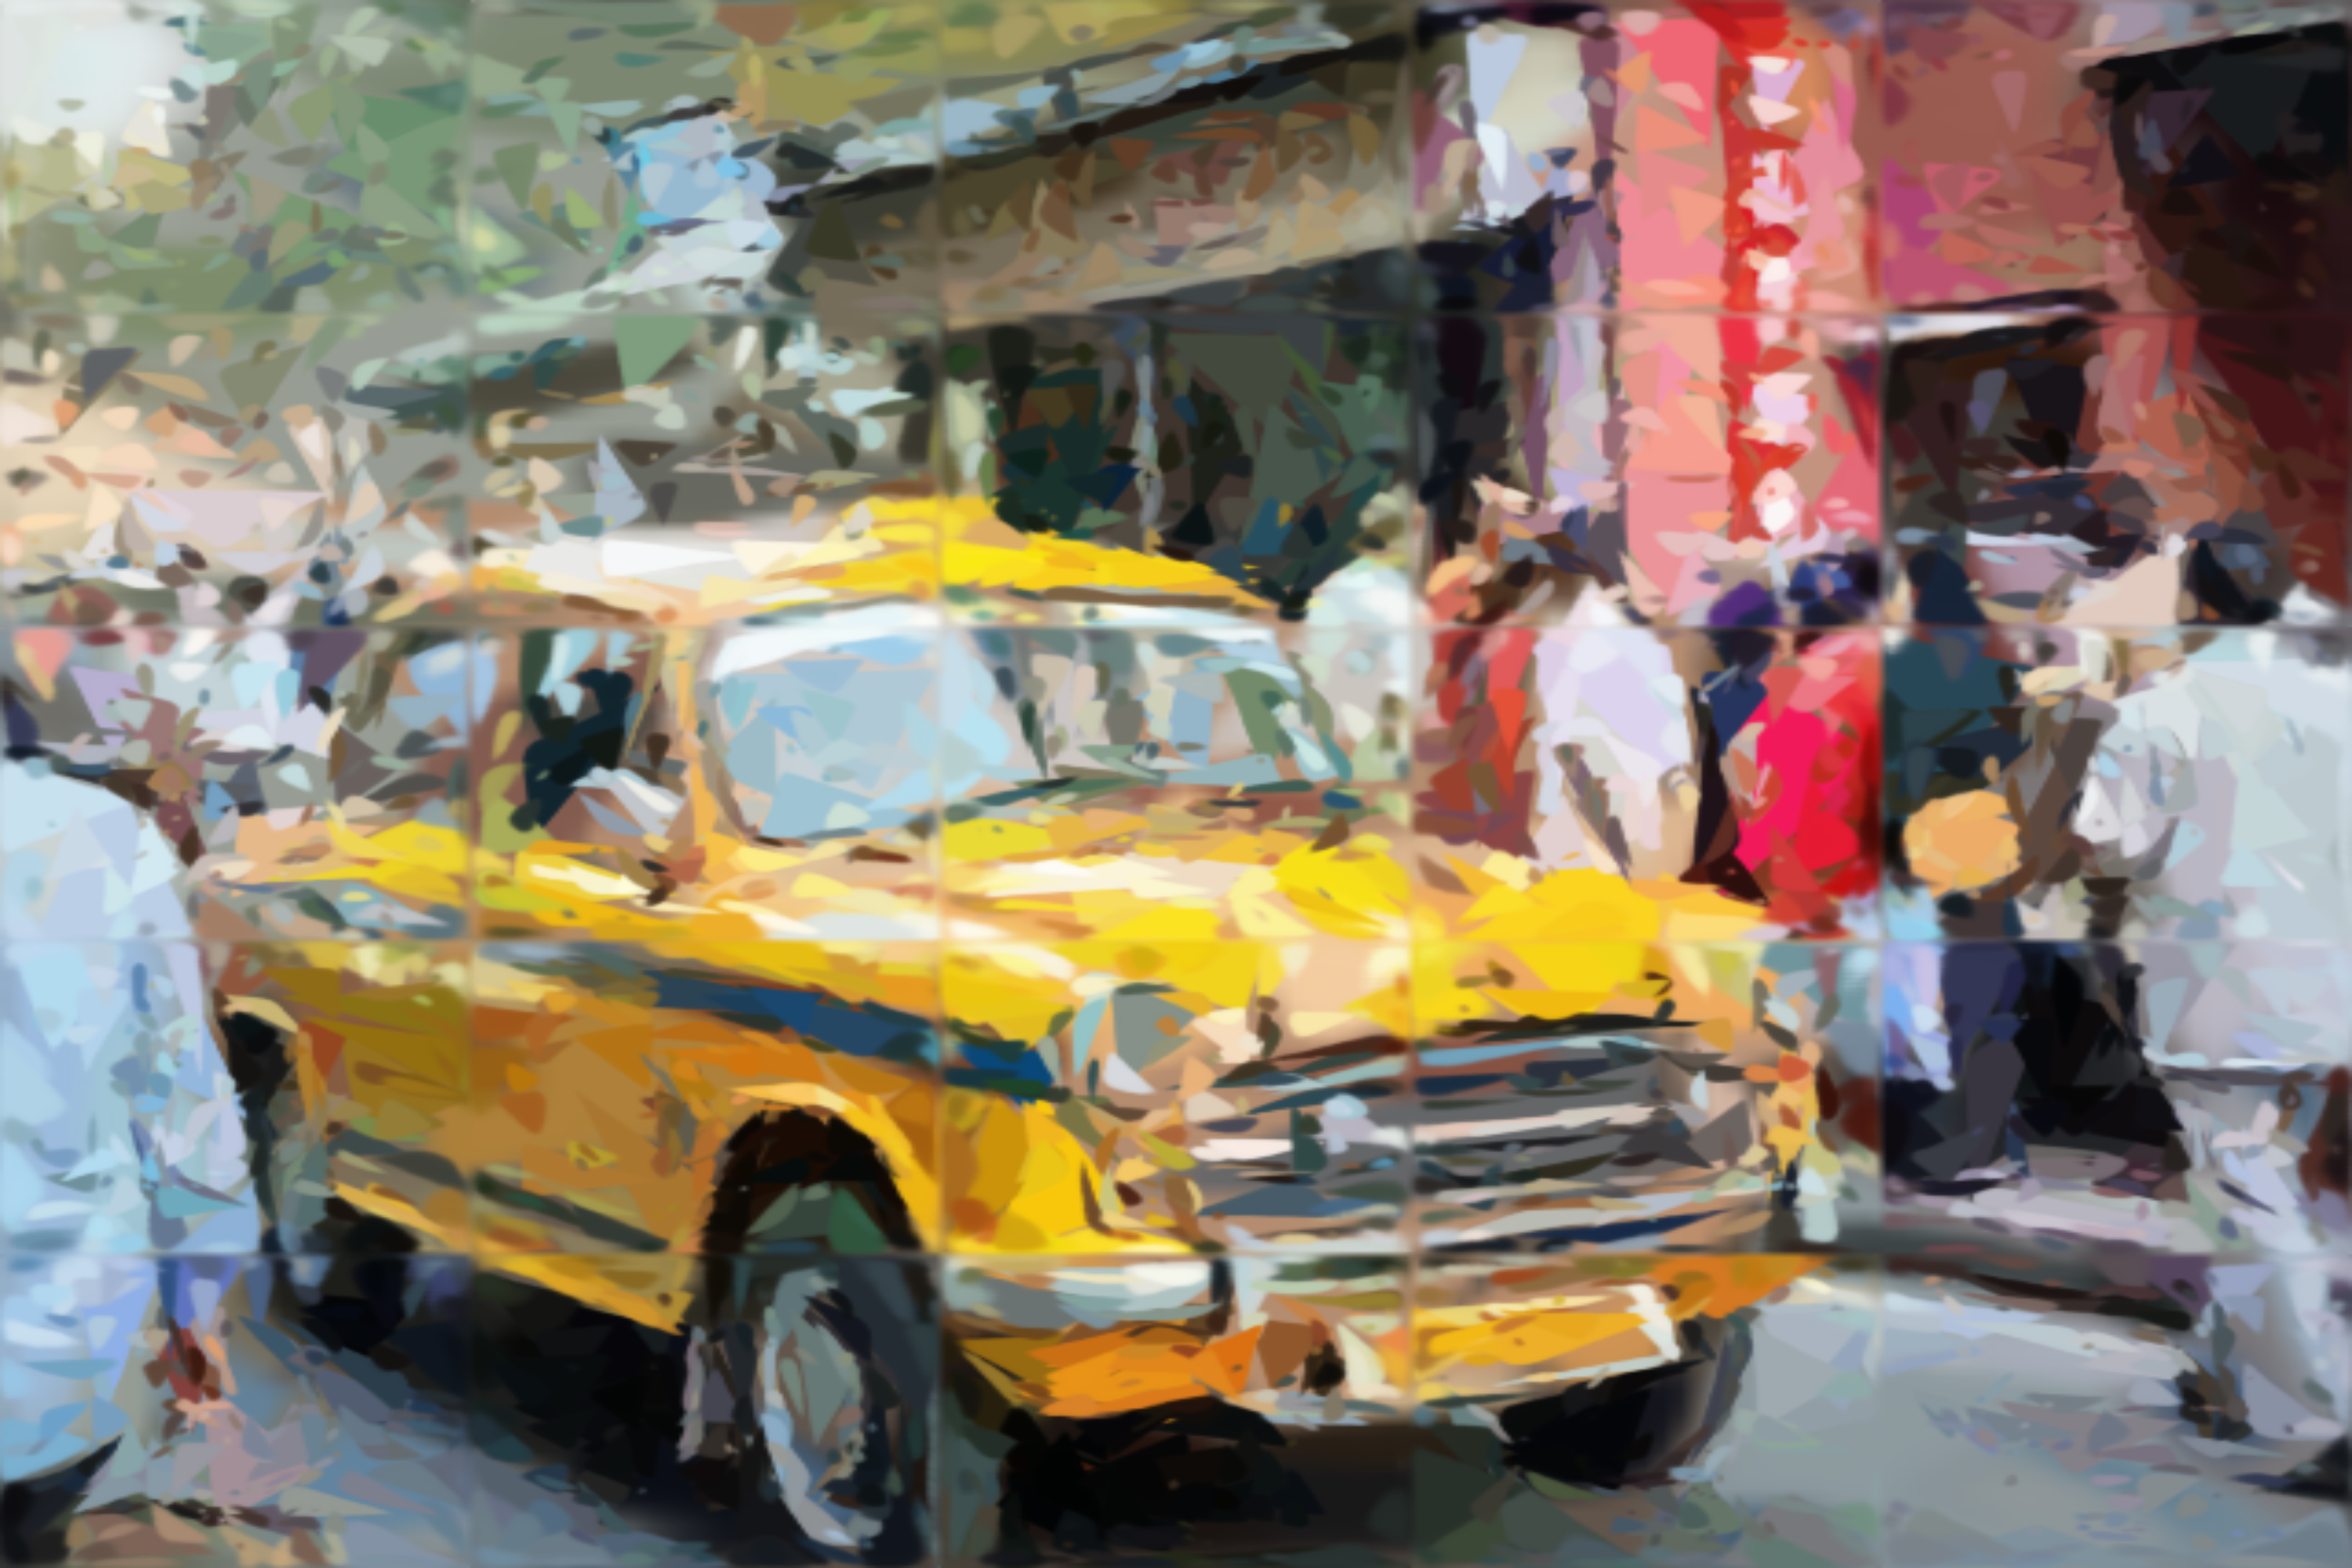

In [ ]:
display(Image('output/generated399.png'))

# 7. Download it!

In [ ]:
files.download("./video.mp4")

In [ ]:
files.download("output/generated399.png")

### If you want to try with another picture go to step 3 or if you wanna try with another stroke pattern (round, triangle, etc) start from step 2